<!-- Projeto Desenvolvido na Data Science Academy - www.datascienceacademy.com.br -->
# <font color='blue'>Data Science Academy</font>
### <font color='blue'>Modelagem de Séries Temporais e Real-Time Analytics com Apache Spark e Databricks</font>
### <font color='blue'>Projeto 1 - Tarefa 5</font>
### <font color='blue'>Prevendo Usuários Ativos em Um Web Site</font>

## Instalando e Carregando os Pacotes

In [1]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# !pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
# !pip install -q -U watermark

In [1]:
# Imports para manipulação de dados
import numpy as np
import pandas as pd

# Imports para visualização de dados
import matplotlib.pyplot as plt
import matplotlib as m
import seaborn as sns

# Imports para análise de dados
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Filtra warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Formatação para os gráficos e tabelas
plt.style.use('ggplot')
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
# Formatando os labels dos gráficos
from pylab import rcParams
rcParams['axes.labelsize'] = 14
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
rcParams['text.color'] = 'k'
rcParams['figure.figsize'] = 18, 8
plt.style.use('fivethirtyeight')

In [5]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy"

Author: Data Science Academy



## Carregando o Conjunto de Dados

In [4]:
# Carrega os dados
# Observe que estamos carregando os dados e já definindo a data como índice com o parâmetro index_col = 0
dados = pd.read_csv('dataset.csv', 
                    header = None, 
                    index_col = 0,
                    names = ['usuarios_ativos'])

In [5]:
# Série
dados.head()

,usuarios_ativos
2013-01,110
2013-02,121
2013-03,135
2013-04,127
2013-05,128


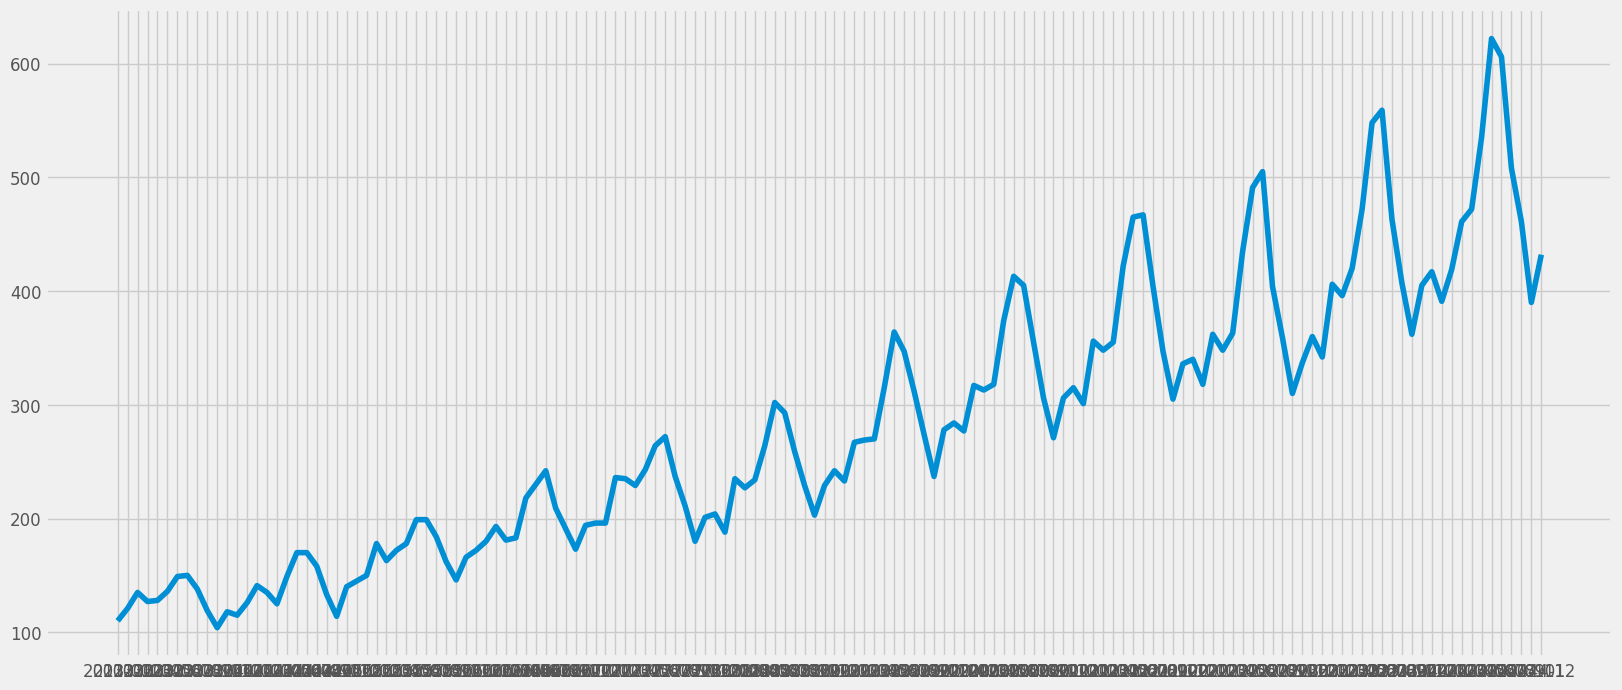

In [6]:
# Plot
plt.plot(dados)

In [7]:
# Função para testar a estacionaridade
def dsa_testa_estacionaridade(serie):
    
    # Calcula estatísticas móveis
    rolmean = serie.rolling(window = 12).mean()
    rolstd = serie.rolling(window = 12).std()

    # Plot das estatísticas móveis
    orig = plt.plot(serie, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Média Móvel')
    std = plt.plot(rolstd, color = 'black', label = 'Desvio Padrão')
    
    # Plot
    plt.legend(loc = 'best')
    plt.title('Estatísticas Móveis - Média e Desvio Padrão')
    plt.show()
    
    # Teste Dickey-Fuller:
    # Print
    print('\nResultado do Teste Dickey-Fuller:\n')

    # Teste
    dfteste = adfuller(serie, autolag = 'AIC')

    # Formatando a saída
    dfsaida = pd.Series(dfteste[0:4], index = ['Estatística do Teste',
                                               'Valor-p',
                                               'Número de Lags Consideradas',
                                               'Número de Observações Usadas'])

    # Loop por cada item da saída do teste
    for key, value in dfteste[4].items():
        dfsaida['Valor Crítico (%s)'%key] = value

    # Print
    print (dfsaida)
    
    # Testa o valor-p
    print ('\nConclusão:')
    if dfsaida[1] > 0.05:
        print('\nO valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.')
        print('Essa série provavelmente não é estacionária.')
    else:
        print('\nO valor-p é menor que 0.05 e, portanto, temos evidências para rejeitar a hipótese nula.')
        print('Essa série provavelmente é estacionária.')

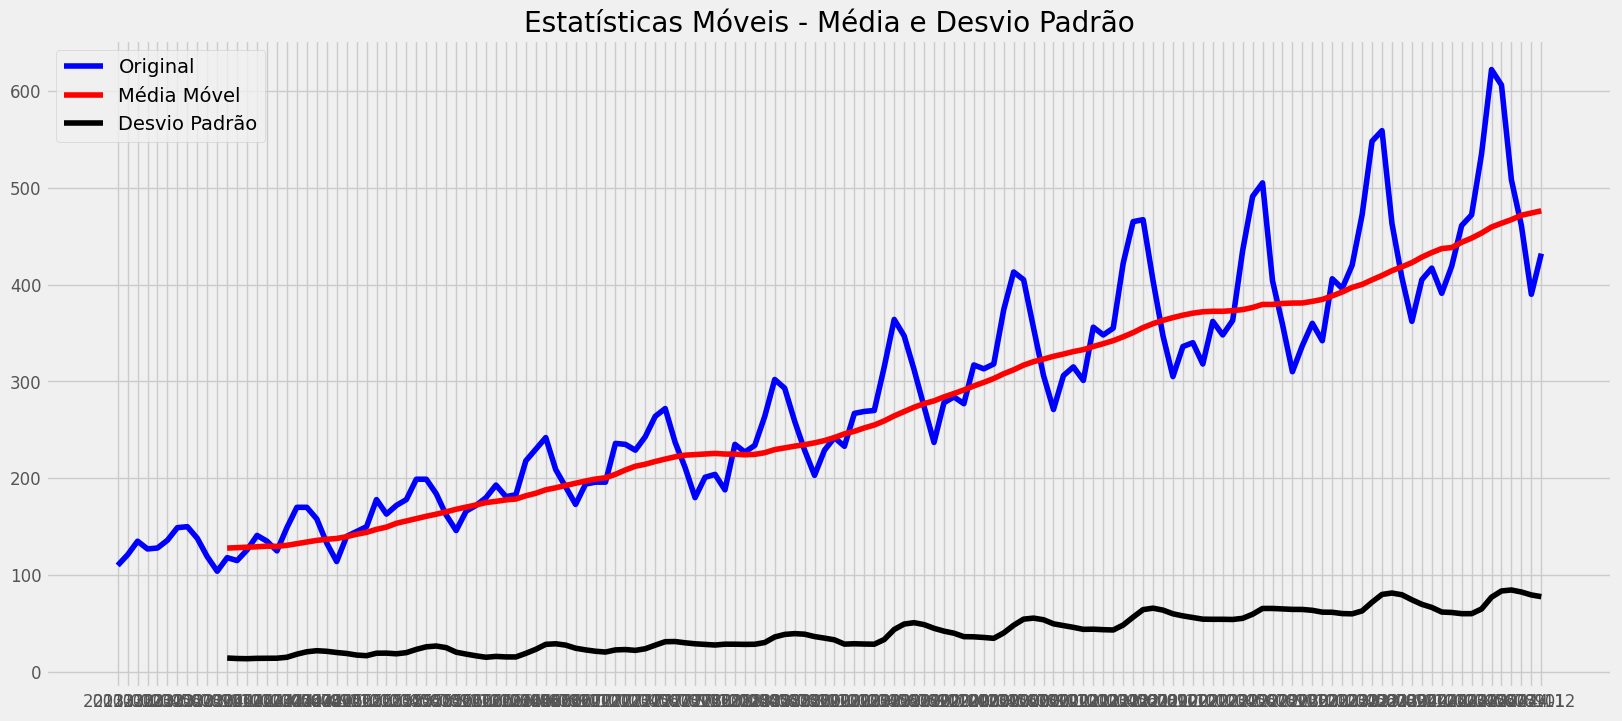


Resultado do Teste Dickey-Fuller:

Estatística do Teste              0.809204
Valor-p                           0.991783
Número de Lags Consideradas      13.000000
Número de Observações Usadas    130.000000
Valor Crítico (1%)               -3.481682
Valor Crítico (5%)               -2.884042
Valor Crítico (10%)              -2.578770
dtype: float64

Conclusão:

O valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.
Essa série provavelmente não é estacionária.


In [8]:
# Vamos testar a estacionaridade da série antes de qualquer transformação
dsa_testa_estacionaridade(dados)

A série claramente não é estacionária. Média e variância (nesse caso desvio padrão, que é raiz quadrada da variância) variam ao longo do tempo. 

Vamos aplicar técnicas de diferenciação e tentar estacionarizar a série.

## Diferenciação Para Remover Tendência

Vamos primeiro colocar os dados na mesma escala com a transformação de log e em seguida aplicar a diferenciação.

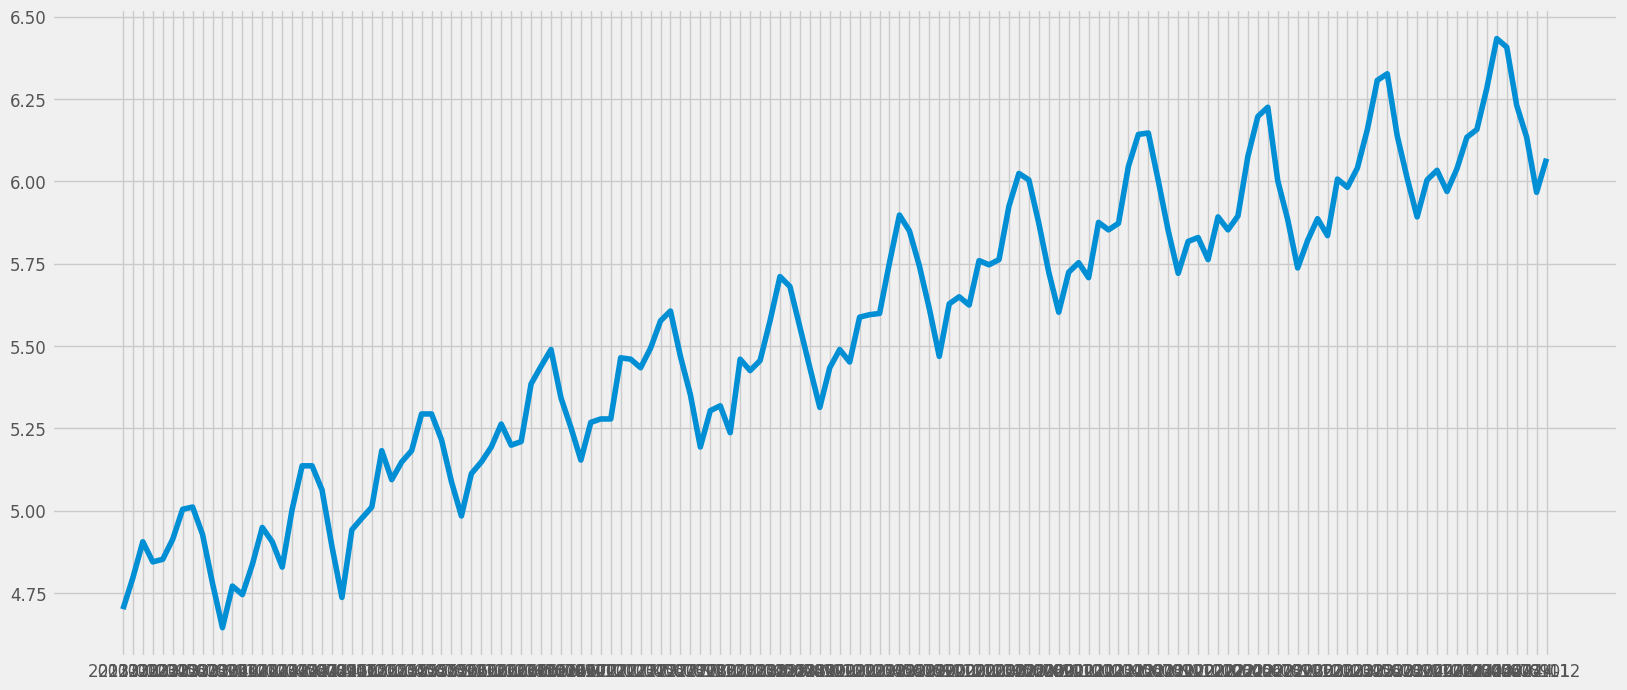

In [9]:
# Transformação de log
dados_serie_log = np.log(dados)
plt.plot(dados_serie_log)

In [10]:
dados_serie_log.head()

,usuarios_ativos
2013-01,4.700480
2013-02,4.795791
2013-03,4.905275
2013-04,4.844187
2013-05,4.852030


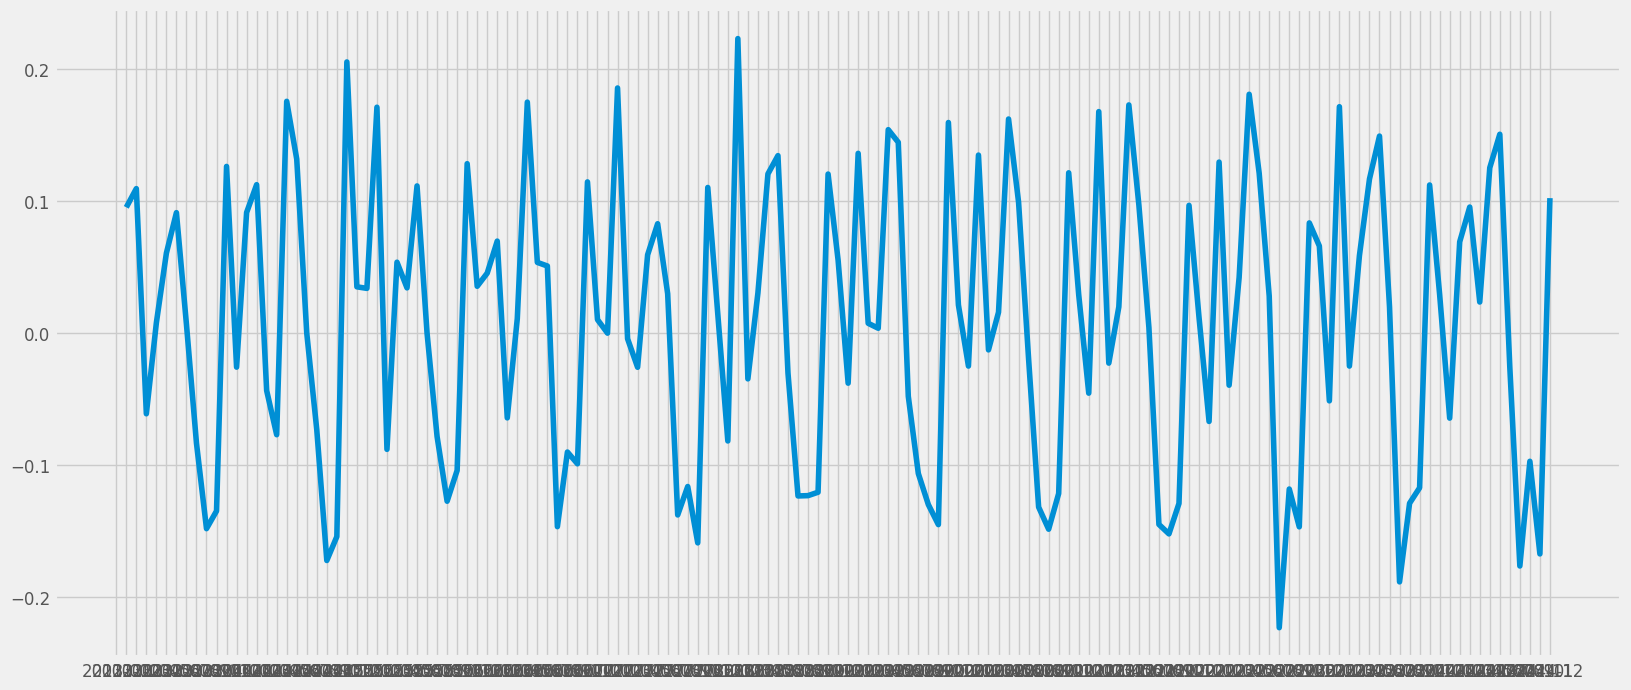

In [11]:
# Diferenciação Para Remover Tendência - Exemplo 1
# O método shift() move os dados em uma unidade
# Observe que estamos usando a série com transformação de log já aplicada
dados_serie_diff1 = dados_serie_log.usuarios_ativos - dados_serie_log.usuarios_ativos.shift()
plt.plot(dados_serie_diff1)
plt.show();

In [12]:
# Você pode criar sua função para diferenciação, se desejar:
def dsa_diffFunc(dataset, interval = 1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff

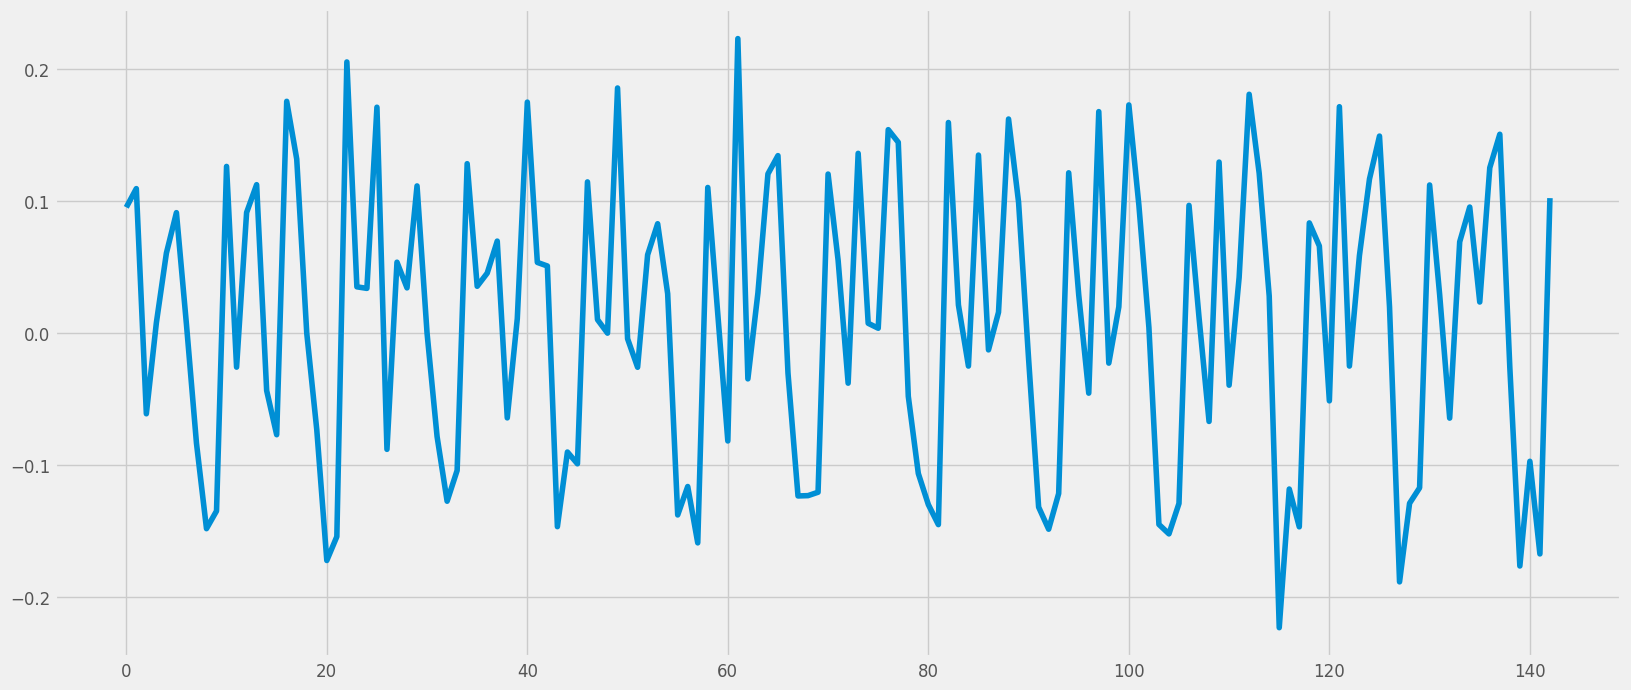

In [13]:
# Diferenciação Para Remover Tendência - Exemplo 2
# Observe que estamos usando a série com transformação de log
dados_serie_diff2 = dsa_diffFunc(dados_serie_log['usuarios_ativos'])
plt.plot(dados_serie_diff2)

In [14]:
# Converte em dataframe, a lista gerada ao aplicar a diferenciação
dados_serie_diff2_df = pd.DataFrame(dados_serie_diff2) 

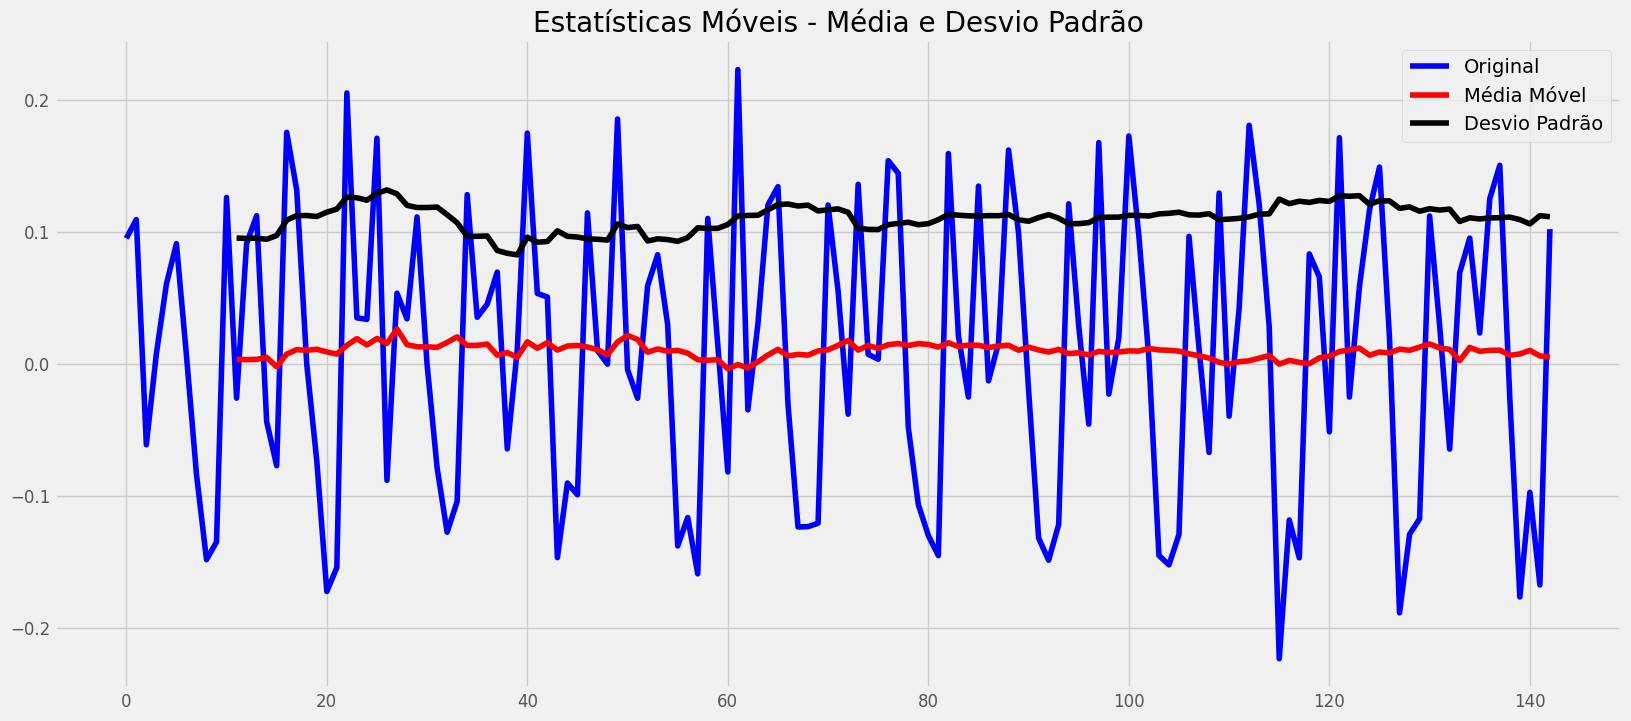


Resultado do Teste Dickey-Fuller:

Estatística do Teste             -3.090791
Valor-p                           0.027242
Número de Lags Consideradas      12.000000
Número de Observações Usadas    130.000000
Valor Crítico (1%)               -3.481682
Valor Crítico (5%)               -2.884042
Valor Crítico (10%)              -2.578770
dtype: float64

Conclusão:

O valor-p é menor que 0.05 e, portanto, temos evidências para rejeitar a hipótese nula.
Essa série provavelmente é estacionária.


In [15]:
# Vamos testar a estacionaridade da série após a diferenciação para remover a tendência
# Como os 2 exemplos anteriores geram o mesmo resultado, vamos usar o segundo
dsa_testa_estacionaridade(dados_serie_diff2_df)

O valor-p reduziu bastante e está quase próximo do limite e média e variância estão quase constantes. Talvez remover somente a tendência ou somente a sazonalidade não seja suficiente. Vamos então tentar remover ambos. 

## Diferenciação Para Remover Sazonalidade

O exemplo abaixo aplica a função dsa_diffFunc() à última versão da nossa série até aqui, com transformacão de log e diferenciação para remover tendência. Ou seja, aplicamos duas rodadas de diferenciação.

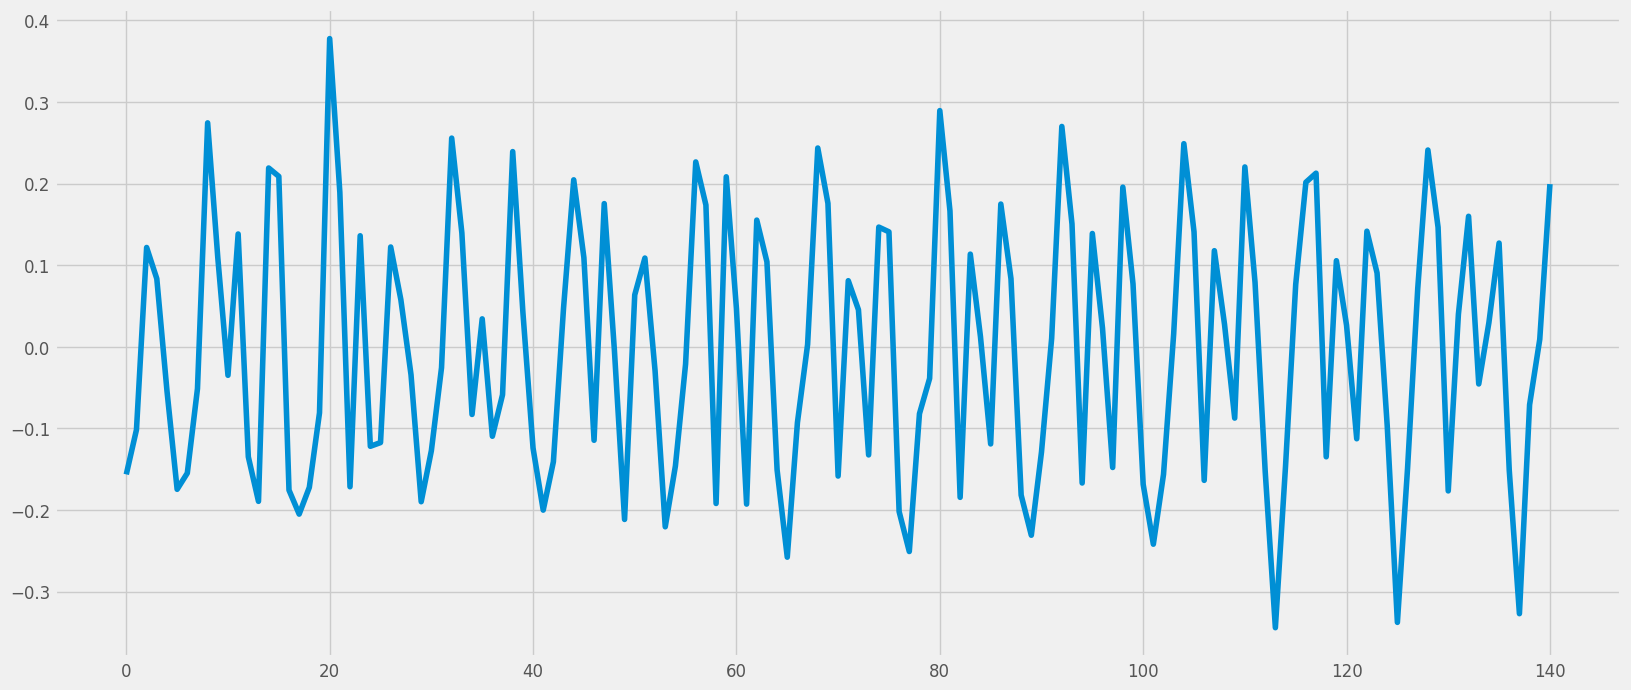

In [16]:
# Diferenciação para remover sazonalidade
# Observe o valor 2. Representa o intervalo para calcular a diferenciação. 
# Colocamos o valor 2 apenas para mostrar que é possível, mas se usarmos o valor 1 como usamos na 
# primeira diferenciação, o resultado é tão bom quanto.
dados_serie_diff3 = dsa_diffFunc(dados_serie_diff2, 2)
plt.plot(dados_serie_diff3)
plt.show();

In [17]:
# Converte em dataframe a lista gerada ao aplicar a diferenciação
dados_serie_final = pd.DataFrame(dados_serie_diff3) 

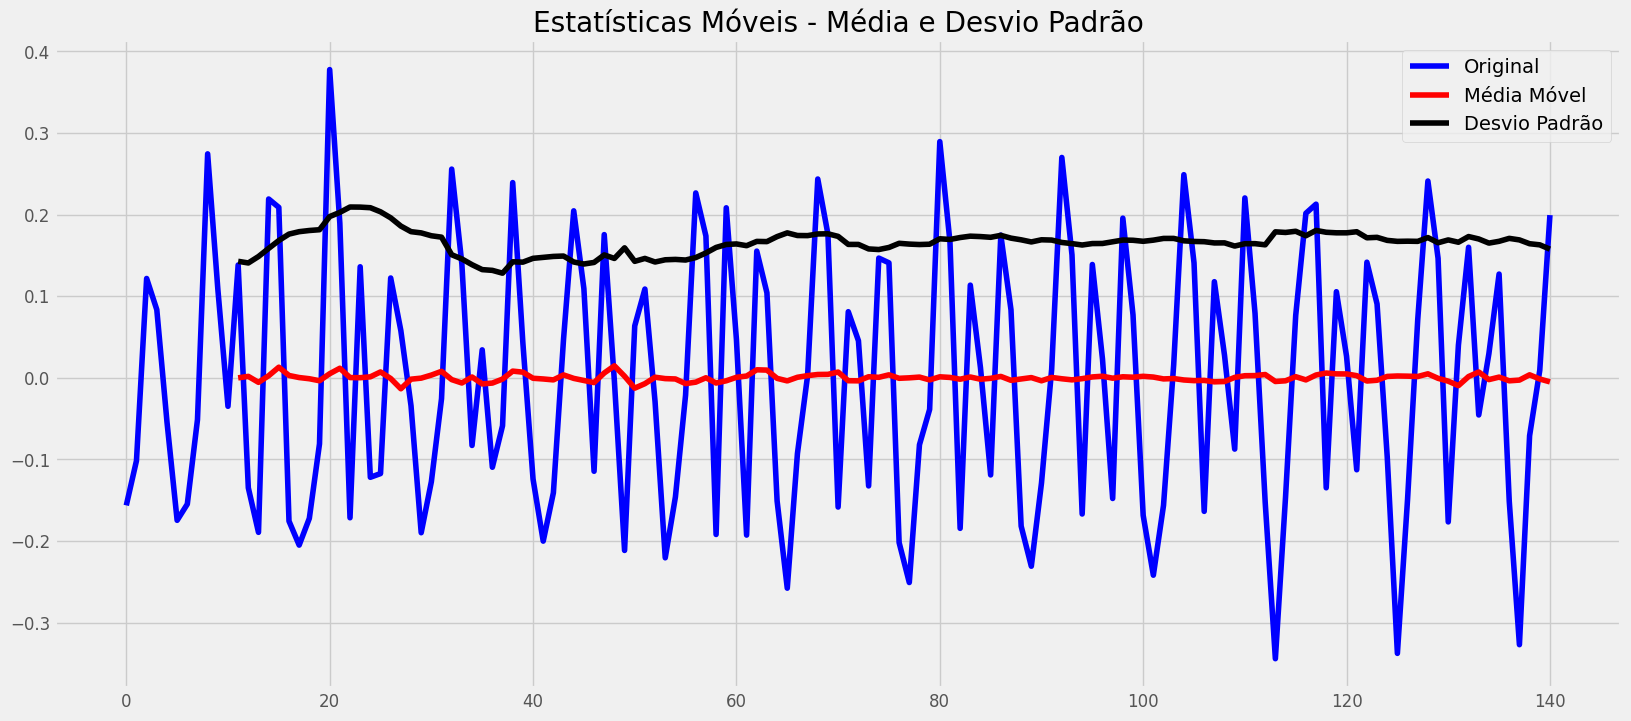


Resultado do Teste Dickey-Fuller:

Estatística do Teste           -1.506252e+01
Valor-p                         8.961787e-28
Número de Lags Consideradas     1.000000e+01
Número de Observações Usadas    1.300000e+02
Valor Crítico (1%)             -3.481682e+00
Valor Crítico (5%)             -2.884042e+00
Valor Crítico (10%)            -2.578770e+00
dtype: float64

Conclusão:

O valor-p é menor que 0.05 e, portanto, temos evidências para rejeitar a hipótese nula.
Essa série provavelmente é estacionária.


In [18]:
# Testa a estacionaridade
dsa_testa_estacionaridade(dados_serie_final)

Ufa! Deu trabalho. Mas aí está. Nossa série agora é estacionária e conseguimos isso sem perder dados. Podemos usá-la para construir modelos preditivos. Observe que as estatísticas agora são constantes e não variam mais com o tempo.

Ou seja, transformamos os dados, mas sem perder a informação, a fim de observar a tendência da série por outro ângulo e agora poder realizar previsões verdadeiramente válidas e profissionais. Se usássemos a série no formato original, faríamos previsões incorretas. 

Cada uma das técnicas mostradas aqui tem pontos positivos e negativos e serão mais ou menos eficientes dependendo dos dados.

Vamos construir nossos modelos preditivos e prever o número de usuários ativos no próximo capítulo.

In [21]:
%reload_ext watermark
%watermark -a "Data Science Academy"

Author: Data Science Academy



In [22]:
#%watermark -v -m

In [23]:
#%watermark --iversions

# Fim da Tarefa 5